In [6]:
import pandas as pd
metadata_indicator_df = pd.read_csv('Metadata_Indicator.csv')
api_df = pd.read_csv('API_SP.POP.TOTL.csv', skiprows=4)
metadata_country_df = pd.read_csv('Metadata_Country_API.csv')

In [13]:
print(metadata_indicator_df.head())

  INDICATOR_CODE     INDICATOR_NAME  \
0    SP.POP.TOTL  Population, total   

                                         SOURCE_NOTE  \
0  Total population is based on the de facto defi...   

                                 SOURCE_ORGANIZATION  Unnamed: 4  
0  (1) United Nations Population Division. World ...         NaN  


In [14]:
print(api_df.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [15]:
print(metadata_country_df.head())

  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         Na

In [16]:
# Extract relevant columns from the API dataframe for the year 2022
population_2022 = api_df[['Country Name', 'Country Code', '2022']]


In [17]:
# Merge with metadata_country_df to get the region information
merged_df = pd.merge(population_2022, metadata_country_df[['Country Code', 'Region']], on='Country Code', how='left')


In [18]:
# Group by region and sum the population
region_population = merged_df.groupby('Region')['2022'].sum().sort_values(ascending=False)


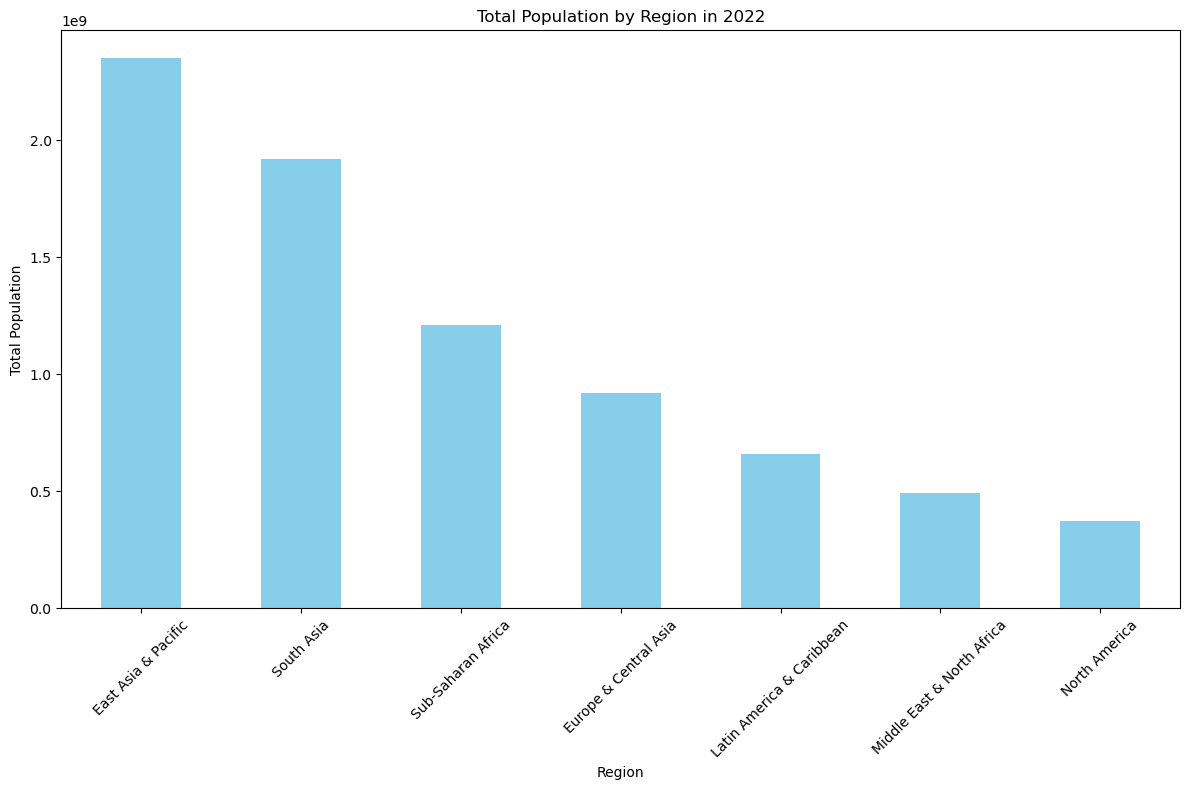

In [19]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(12, 8))
region_population.plot(kind='bar', color='skyblue')
plt.title('Total Population by Region in 2022')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
